In [ ]:
# Data set download
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [1]:
# import Pandas, Matplotlib, Seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#import the data set in data frame and check whether there is a missing value
df = pd.read_csv('clean_automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [11]:
df['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [20]:
#There are 3 missing values in the column 'stroke'
# We need to find a way to fill in these missing values
# Values from 52->53 have many identical features, hence, we can fill in the same value of 'stroke' to them
# Value 55 belongs to differenct horsepower-binned. Hence, it is uncertain this car has the same stroke
# Delete value 55
df[df['stroke'].isnull()]
df.drop([55],axis = 0,inplace=True)

In [21]:
df.reset_index(level=None,inplace=True)

In [23]:
avg_stroke = df['stroke'].mean()
avg_stroke 

3.2569035532994857

In [26]:
#import numpy
import numpy as np

In [27]:
df['stroke'].replace(np.nan,round(avg_stroke,2),inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
index                200 non-null int64
symboling            200 non-null int64
normalized-losses    200 non-null int64
make                 200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-nul

In [33]:
# The horsepower is 262, which belongs to high category.
df['horsepower-binned'].replace(np.nan,'High',inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
index                200 non-null int64
symboling            200 non-null int64
normalized-losses    200 non-null int64
make                 200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-nul

In [50]:
df.drop(columns='index',axis=1,inplace=True)

In [51]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.463040,-0.535445,-0.364640,-0.243468,-0.543440,-0.233942,-0.101910,-0.141042,-0.007796,-0.181921,0.069147,0.268071,-0.023465,0.046480,-0.085704,0.050814,-0.195381,0.195381
normalized-losses,0.463040,1.000000,-0.054276,0.021330,0.087368,-0.369659,0.100073,0.117926,-0.029905,0.055363,-0.114104,0.214379,0.233885,-0.220287,-0.177828,0.132937,0.232840,-0.100309,0.100309
wheel-base,-0.535445,-0.054276,1.000000,0.875925,0.814943,0.590616,0.782462,0.571063,0.493646,0.158010,0.249992,0.374582,-0.358335,-0.477600,-0.548785,0.586159,0.486274,0.306617,-0.306617
length,-0.364640,0.021330,0.875925,1.000000,0.857381,0.492268,0.880857,0.685132,0.609236,0.123906,0.159414,0.582923,-0.284628,-0.671979,-0.703099,0.691752,0.667538,0.210636,-0.210636
width,-0.243468,0.087368,0.814943,0.857381,1.000000,0.307486,0.866195,0.731283,0.544895,0.188804,0.189802,0.616580,-0.247094,-0.637469,-0.683346,0.751597,0.680235,0.244278,-0.244278
height,-0.543440,-0.369659,0.590616,0.492268,0.307486,1.000000,0.308926,0.065733,0.181747,-0.061523,0.260028,-0.080526,-0.298923,-0.062803,-0.115672,0.139160,0.020142,0.280871,-0.280871
curb-weight,-0.233942,0.100073,0.782462,0.880857,0.866195,0.308926,1.000000,0.851213,0.644077,0.167367,0.156348,0.759821,-0.280784,-0.754218,-0.798077,0.834802,0.793401,0.220934,-0.220934
engine-size,-0.101910,0.117926,0.571063,0.685132,0.731283,0.065733,0.851213,1.000000,0.574430,0.206264,0.027899,0.831624,-0.249203,-0.664181,-0.690380,0.877091,0.764858,0.069140,-0.069140
bore,-0.141042,-0.029905,0.493646,0.609236,0.544895,0.181747,0.644077,0.574430,1.000000,-0.055390,0.001260,0.567972,-0.269677,-0.585062,-0.593228,0.543289,0.559589,0.054468,-0.054468
stroke,-0.007796,0.055363,0.158010,0.123906,0.188804,-0.061523,0.167367,0.206264,-0.055390,1.000000,0.187842,0.098450,-0.063663,-0.034444,-0.035020,0.082267,0.036837,0.241050,-0.241050


In [37]:
df.describe()

,index,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.225000,0.830000,121.860000,98.814500,0.837227,0.915139,53.787500,2555.94500,127.110000,3.330696,3.256950,10.168100,103.247562,5113.253695,25.225000,30.72500,13194.940000,9.920429,0.100000,0.900000
std,58.226075,1.248557,32.014764,6.076509,0.059335,0.029260,2.436035,518.57975,41.517665,0.268745,0.316841,4.014648,37.392116,475.194513,6.406214,6.81038,7965.124912,2.518501,0.300753,0.300753
min,0.000000,-2.000000,65.000000,86.600000,0.678039,0.837500,47.800000,1488.00000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000,4.795918,0.000000,0.000000
25%,49.750000,0.000000,100.250000,94.500000,0.800937,0.890278,52.000000,2163.00000,98.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.00000,7775.000000,7.833333,0.000000,1.000000
50%,100.500000,1.000000,122.000000,97.000000,0.832292,0.909722,54.100000,2414.00000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.00000,10270.000000,9.791667,0.000000,1.000000
75%,150.250000,2.000000,137.000000,102.400000,0.881788,0.926042,55.525000,2928.25000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.00000,16500.750000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.000000,120.900000,1.000000,1.000000,59.800000,4066.00000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.00000,45400.000000,18.076923,1.000000,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
symboling            200 non-null int64
normalized-losses    200 non-null int64
make                 200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-null float64
peak-rpm             200 non-n

In [61]:
numeric_value = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','city-L/100km']

In [64]:
df[['price','normalized-losses','wheel-base','length','width','height']].corr()
    

,price,normalized-losses,wheel-base,length,width,height
price,1.000000,0.132937,0.586159,0.691752,0.751597,0.139160
normalized-losses,0.132937,1.000000,-0.054276,0.021330,0.087368,-0.369659
wheel-base,0.586159,-0.054276,1.000000,0.875925,0.814943,0.590616
length,0.691752,0.021330,0.875925,1.000000,0.857381,0.492268
width,0.751597,0.087368,0.814943,0.857381,1.000000,0.307486
height,0.139160,-0.369659,0.590616,0.492268,0.307486,1.000000


In [65]:
df[['price','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower']].corr()
    

,price,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower
price,1.000000,0.834802,0.877091,0.543289,0.082267,0.071425,0.809919
curb-weight,0.834802,1.000000,0.851213,0.644077,0.167367,0.156348,0.759821
engine-size,0.877091,0.851213,1.000000,0.574430,0.206264,0.027899,0.831624
bore,0.543289,0.644077,0.574430,1.000000,-0.055390,0.001260,0.567972
stroke,0.082267,0.167367,0.206264,-0.055390,1.000000,0.187842,0.098450
compression-ratio,0.071425,0.156348,0.027899,0.001260,0.187842,1.000000,-0.214108
horsepower,0.809919,0.759821,0.831624,0.567972,0.098450,-0.214108,1.000000


In [66]:
df[['price','peak-rpm','city-mpg','highway-mpg','city-L/100km']].corr()

,price,peak-rpm,city-mpg,highway-mpg,city-L/100km
price,1.000000,-0.105391,-0.688070,-0.705378,0.794219
peak-rpm,-0.105391,1.000000,-0.103579,-0.048712,0.100215
city-mpg,-0.688070,-0.103579,1.000000,0.972041,-0.949508
highway-mpg,-0.705378,-0.048712,0.972041,1.000000,-0.930599
city-L/100km,0.794219,0.100215,-0.949508,-0.930599,1.000000


In [ ]:
# Draw some regression line to observe clearn the linear relationship

In [78]:
df_price = df[['price','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore']]

In [79]:
df_price.head()

,price,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore
0,13495.0,122,88.6,0.811148,0.890278,48.8,2548,130,3.47
1,16500.0,122,88.6,0.811148,0.890278,48.8,2548,130,3.47
2,16500.0,122,94.5,0.822681,0.909722,52.4,2823,152,2.68
3,13950.0,164,99.8,0.848630,0.919444,54.3,2337,109,3.19
4,17450.0,164,99.4,0.848630,0.922222,54.3,2824,136,3.19


In [80]:
df_price_1 =df[['price','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','city-L/100km']]

In [81]:
df_price_1.head()

,price,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km
0,13495.0,2.68,9.0,111.0,5000.0,21,27,11.190476
1,16500.0,2.68,9.0,111.0,5000.0,21,27,11.190476
2,16500.0,3.47,9.0,154.0,5000.0,19,26,12.368421
3,13950.0,3.40,10.0,102.0,5500.0,24,30,9.791667
4,17450.0,3.40,8.0,115.0,5500.0,18,22,13.055556


In [84]:
df_price.corr()

,price,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore
price,1.000000,0.132937,0.586159,0.691752,0.751597,0.139160,0.834802,0.877091,0.543289
normalized-losses,0.132937,1.000000,-0.054276,0.021330,0.087368,-0.369659,0.100073,0.117926,-0.029905
wheel-base,0.586159,-0.054276,1.000000,0.875925,0.814943,0.590616,0.782462,0.571063,0.493646
length,0.691752,0.021330,0.875925,1.000000,0.857381,0.492268,0.880857,0.685132,0.609236
width,0.751597,0.087368,0.814943,0.857381,1.000000,0.307486,0.866195,0.731283,0.544895
height,0.139160,-0.369659,0.590616,0.492268,0.307486,1.000000,0.308926,0.065733,0.181747
curb-weight,0.834802,0.100073,0.782462,0.880857,0.866195,0.308926,1.000000,0.851213,0.644077
engine-size,0.877091,0.117926,0.571063,0.685132,0.731283,0.065733,0.851213,1.000000,0.574430
bore,0.543289,-0.029905,0.493646,0.609236,0.544895,0.181747,0.644077,0.574430,1.000000


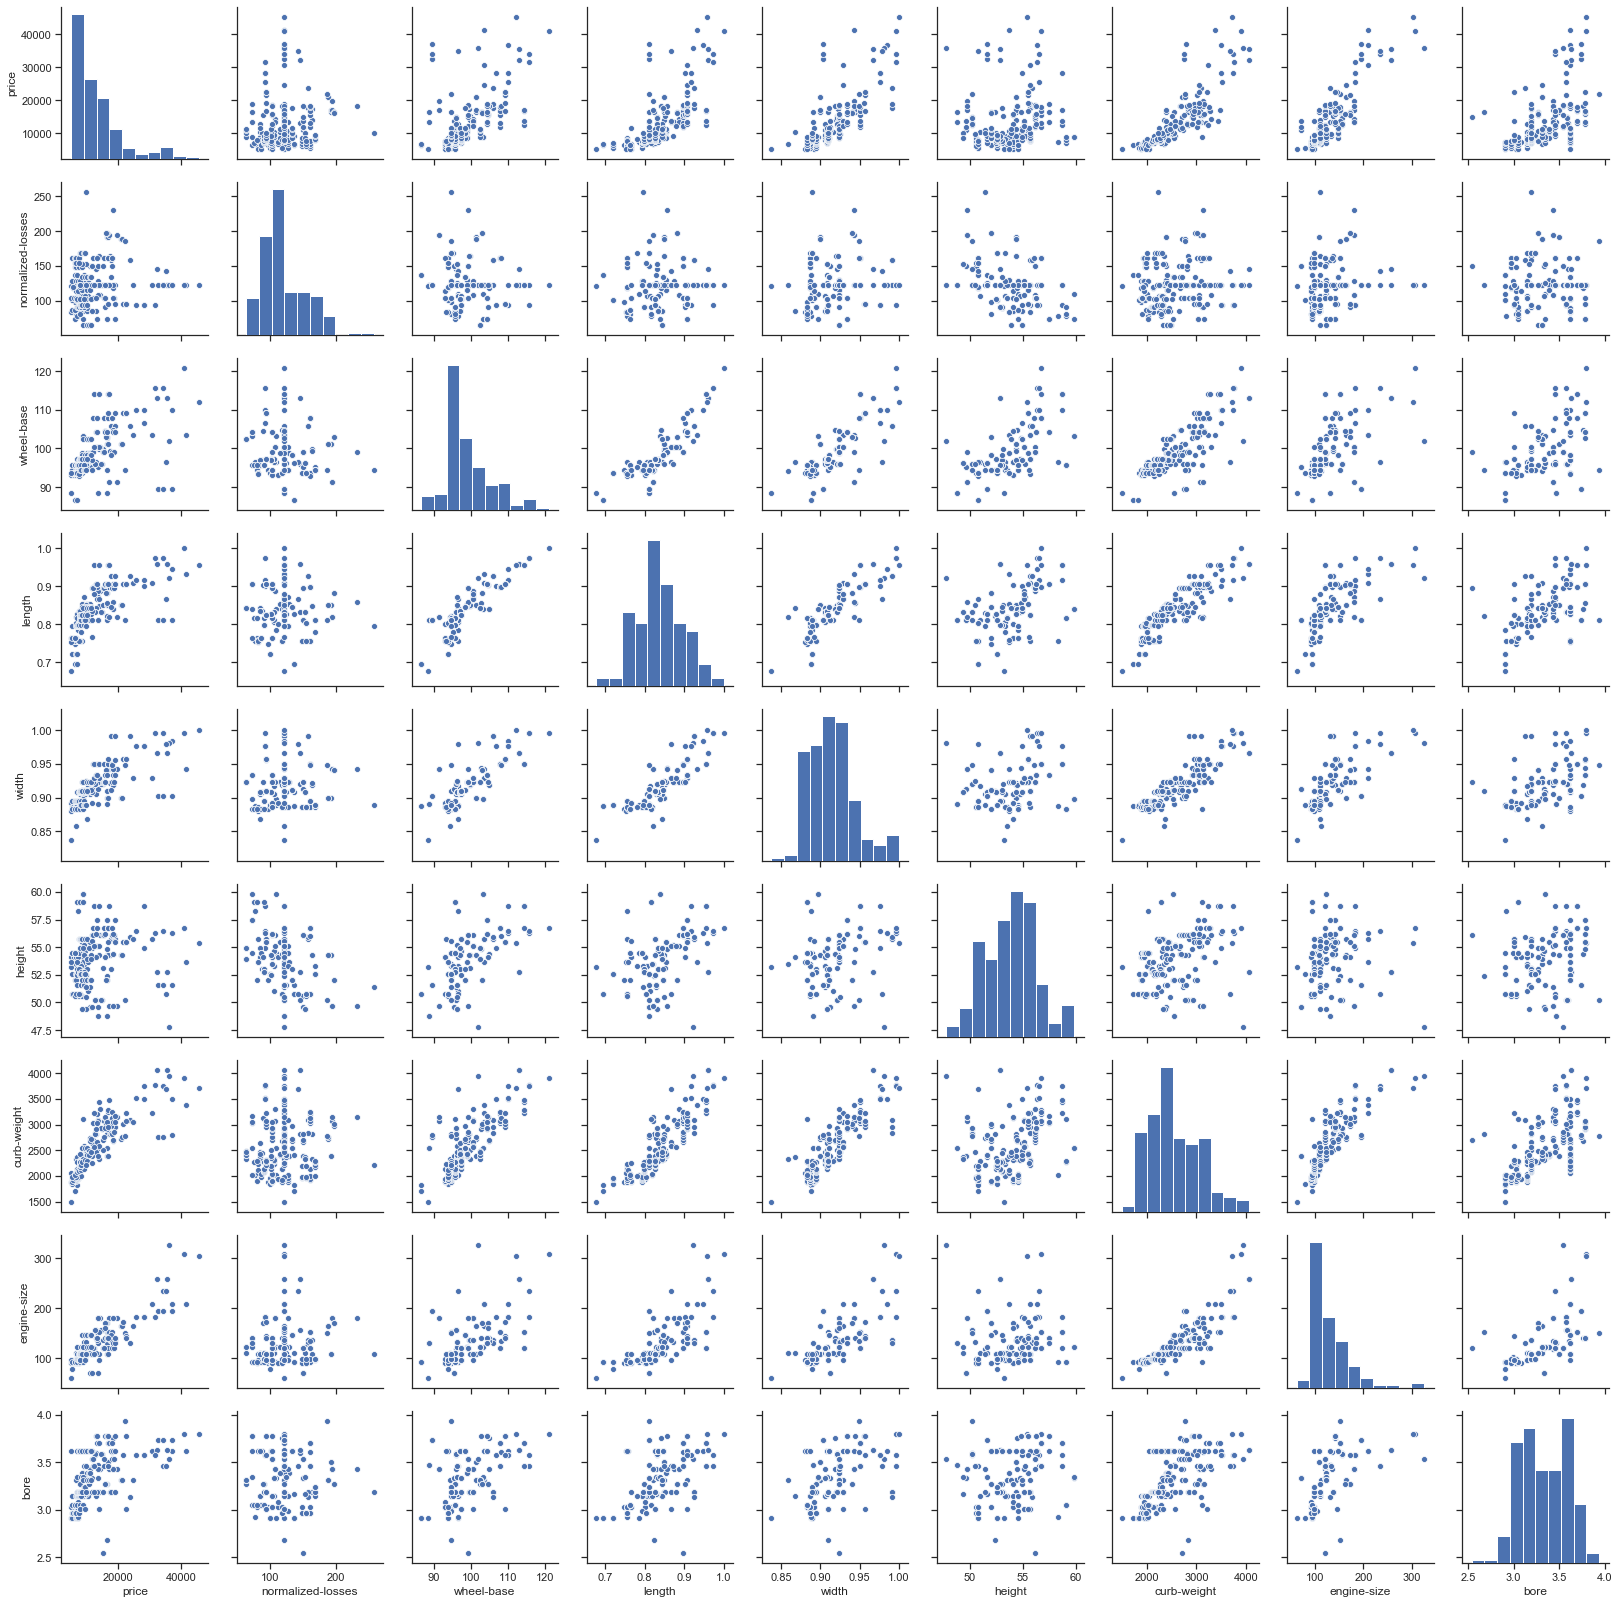

In [82]:
sns.set(style="ticks")

sns.pairplot(df_price)
# Srong relationship includes: 'Wheel-base','length','width','curb-weight','engine size','bore'

In [86]:
df_price_1.corr()

,price,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km
price,1.000000,0.082267,0.071425,0.809919,-0.105391,-0.688070,-0.705378,0.794219
stroke,0.082267,1.000000,0.187842,0.098450,-0.063663,-0.034444,-0.035020,0.036837
compression-ratio,0.071425,0.187842,1.000000,-0.214108,-0.437812,0.331791,0.268267,-0.300258
horsepower,0.809919,0.098450,-0.214108,1.000000,0.101093,-0.821840,-0.803796,0.891000
peak-rpm,-0.105391,-0.063663,-0.437812,0.101093,1.000000,-0.103579,-0.048712,0.100215
city-mpg,-0.688070,-0.034444,0.331791,-0.821840,-0.103579,1.000000,0.972041,-0.949508
highway-mpg,-0.705378,-0.035020,0.268267,-0.803796,-0.048712,0.972041,1.000000,-0.930599
city-L/100km,0.794219,0.036837,-0.300258,0.891000,0.100215,-0.949508,-0.930599,1.000000


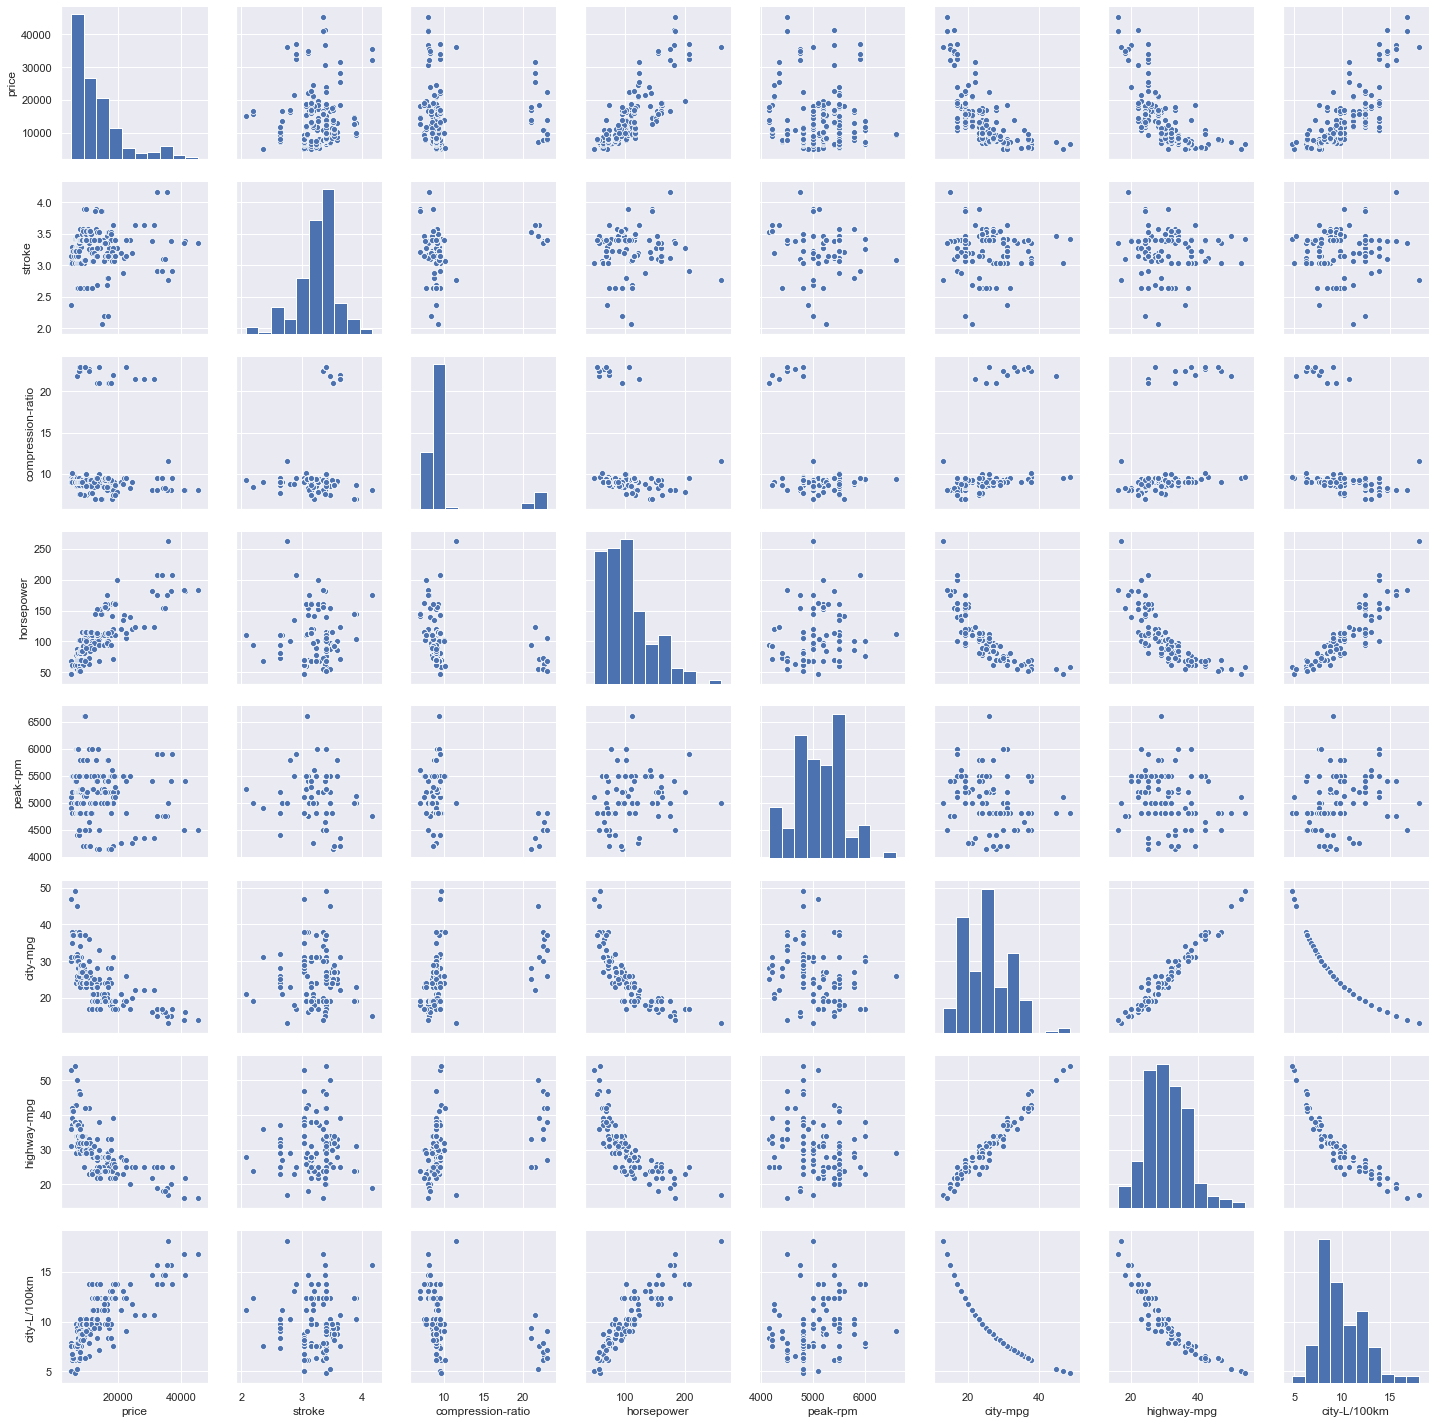

In [85]:
sns.set(style="darkgrid")

sns.pairplot(df_price_1)
# Srong relationship includes: 'horsepower', city-mpg, highway-mpg, city-L/100km

In [ ]:
# Check some categorical variables affect the price. 
# These variables can have the type "object" or "int64". 
# A good way to visualize categorical variables is by using boxplots.

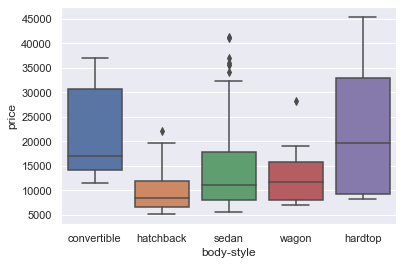

In [87]:
sns.boxplot(x="body-style", y="price", data=df)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
symboling            200 non-null int64
normalized-losses    200 non-null int64
make                 200 non-null object
aspiration           200 non-null object
num-of-doors         200 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 200 non-null float64
stroke               200 non-null float64
compression-ratio    200 non-null float64
horsepower           200 non-null float64
peak-rpm             200 non-n

In [89]:
df.describe(include='all')
#NaN shows us which variable is categorical.

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,200.000000,200.000000,200,200,200,200,200,200,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200,200.000000,200.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,164,115,94,118,197,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.830000,121.860000,NaN,NaN,NaN,NaN,NaN,NaN,98.814500,0.837227,...,10.168100,103.247562,5113.253695,25.225000,30.72500,13194.940000,9.920429,NaN,0.100000,0.900000
std,1.248557,32.014764,NaN,NaN,NaN,NaN,NaN,NaN,6.076509,0.059335,...,4.014648,37.392116,475.194513,6.406214,6.81038,7965.124912,2.518501,NaN,0.300753,0.300753
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.00000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,100.250000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.800937,...,8.575000,70.000000,4800.000000,19.000000,25.00000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.00000,10270.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.00000,16500.750000,12.368421,NaN,0.000000,1.000000


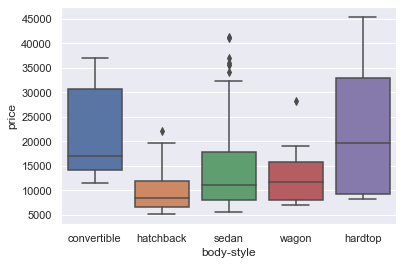

In [96]:
# It's likely that different body-style may give the car different prices.
sns.boxplot(x="body-style", y="price", data=df)

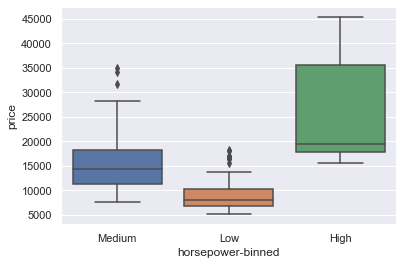

In [92]:
 sns.boxplot(x="horsepower-binned", y="price", data=df)

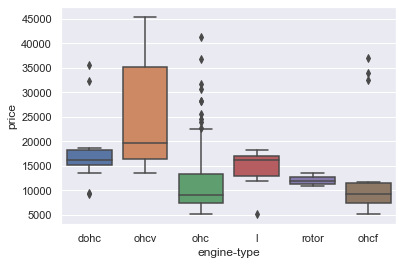

In [93]:
 sns.boxplot(x="engine-type", y="price", data=df) 

In [97]:
# Make & fuel system has a lot of categories. Hence, it is more ease to use software as SPSS

In [98]:
# Run anova analysis for body-style:
import scipy.stats as stats
df_anova = df[['body-style','price']]
group_anova = df_anova.groupby(['body-style'])
anova_result_b_p = stats.f_oneway(group_anova.get_group('sedan')['price'], group_anova.get_group('hatchback')['price'],group_anova.get_group('wagon')['price'],group_anova.get_group('hardtop')['price'],group_anova.get_group('convertible')['price'])

In [99]:
anova_result_b_p
# F is 9.21 & p-value ~ 0 => There is a difference between price in each category

F_onewayResult(statistic=9.233619058467657, pvalue=7.471978557926496e-07)

In [100]:
df['horsepower-binned'].value_counts()

Low       115
Medium     61
High       24
Name: horsepower-binned, dtype: int64

In [102]:
df_anova_1 = df[['horsepower-binned','price']]
group_anova = df_anova_1.groupby(['horsepower-binned'])
anova_result_h_p = stats.f_oneway(group_anova.get_group('Low')['price'], group_anova.get_group('Medium')['price'],group_anova.get_group('High')['price'])

In [103]:
anova_result_h_p
# F is 9.21 & p-value ~ 0 => There is a difference between price in each category

F_onewayResult(statistic=107.86166730192485, pvalue=2.3041430370251974e-32)

In [104]:
df['engine-type'].value_counts()
# ohc is a dominant value. Hence, it is not reliable to use

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      3
Name: engine-type, dtype: int64

In [106]:
#Practice pivot table
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')

In [108]:
grouped_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14260.882353  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222